# Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import  numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,recall_score, f1_score, confusion_matrix,precision_score
from scipy.sparse import hstack,csr_matrix
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout,Input
from sklearn import preprocessing
# from tensorflow.keras.models import Model
import scipy.sparse as sp
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
# from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.model_selection import learning_curve,cross_val_score
# from keras.models import Sequential
# from keras.layers import Dense, Dropout

In [3]:
# from config.config import *
# from libs.common import *
# init_notebook_mode(connected=True)
# print(tf.__version__) # requires version >= 1.9.0

In [4]:
# pd.options.mode.chained_assignment = None

In [5]:
# save_dir=f"{exps_dir}/exp_prj_fake_jobs_postings"
# if os.path.exists(save_dir) == False:
#   os.makedirs(save_dir, exist_ok=True)



# Data Exploration

In [6]:
df = pd.read_csv(f'/content/drive/MyDrive/fake_job_postings.csv')

In [7]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [8]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [10]:
df.shape

(17880, 18)

<Axes: >

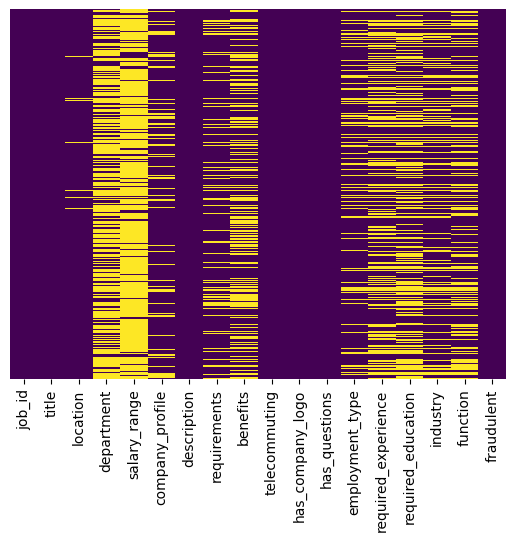

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
df.isnull().sum()

,0
job_id,0
title,0
location,346
department,11547
salary_range,15012
company_profile,3308
description,1
requirements,2696
benefits,7212
telecommuting,0


In [13]:
df.duplicated().sum()

0

In [14]:
categorical=[]
numerical=[]

for col in df.columns:
    if df[col].dtypes !='object':
            numerical.append(col)
    else:
        categorical.append(col)

In [15]:
print(len(categorical))
print(categorical)

13
['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']


In [16]:
print(len(numerical))
print(numerical)

5
['job_id', 'telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']


In [17]:
df[numerical].describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
df[numerical][df[numerical]=='?'].count()

,0
job_id,0
telecommuting,0
has_company_logo,0
has_questions,0
fraudulent,0


In [19]:
df[categorical][df[categorical]=='?'].count()

,0
title,0
location,0
department,0
salary_range,0
company_profile,0
description,0
requirements,0
benefits,0
employment_type,0
required_experience,0


<Axes: >

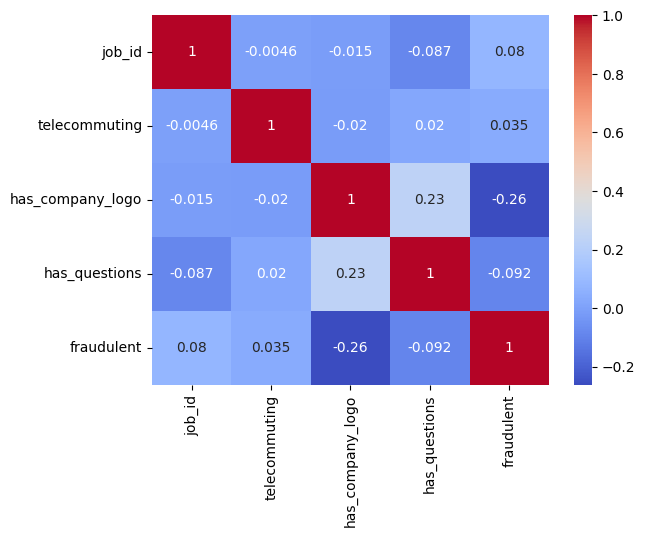

In [20]:
sns.heatmap(df[numerical].corr(), cmap='coolwarm', annot=True)

In [21]:
numerical_to_drop=['telecommuting','has_questions']

df.drop(columns=numerical_to_drop, inplace=True)

<Axes: xlabel='has_company_logo'>

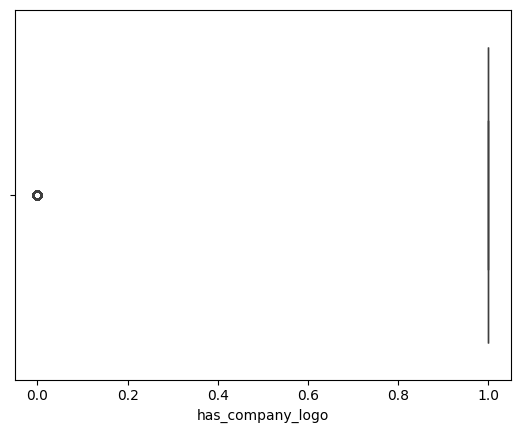

In [22]:
sns.boxplot(x='has_company_logo',data=df)

In [23]:
df=df[df['has_company_logo']>0.0]

<Axes: xlabel='has_company_logo'>

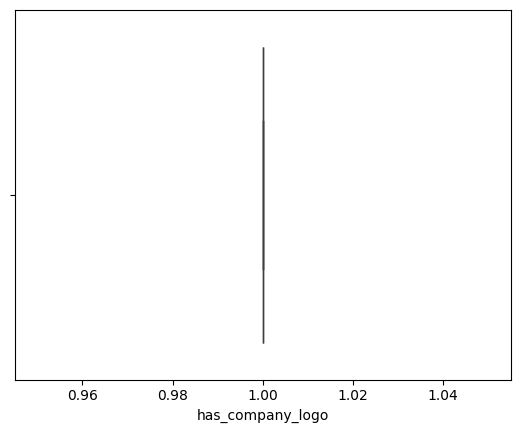

In [24]:
sns.boxplot(x='has_company_logo',data=df)

In [25]:
df['country'] = df['location'].str.split(',').str[0]

<ipython-input-25-b25030a42cff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['location'].str.split(',').str[0]


In [26]:
df.nunique()

,0
job_id,14220
title,9091
location,2393
department,1078
salary_range,659
company_profile,1579
description,11723
requirements,9811
benefits,5094
has_company_logo,1


<ipython-input-27-d1ff3d41137a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='fraudulent',palette='rainbow')


<Axes: xlabel='fraudulent', ylabel='count'>

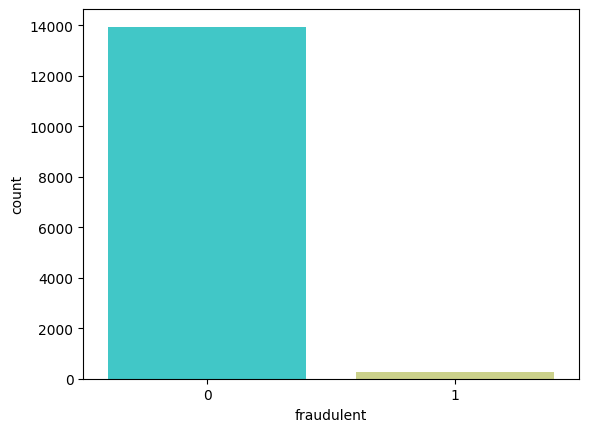

In [27]:
sns.countplot(data=df,x='fraudulent',palette='rainbow')

In [28]:
fake=df[df['fraudulent']==1]
fake.shape

(283, 17)

In [29]:
real=df[df['fraudulent']==0]
real.shape

(13937, 17)

In [30]:
df.shape

(14220, 17)

In [31]:
fake=fake.sample(13937,replace=True)

In [32]:
real.shape,fake.shape

((13937, 17), (13937, 17))

In [33]:
df = pd.concat([fake, real], ignore_index=True)
df.reset_index()

,index,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,0,6173,Dispatcher,"US, OH, Cincinnati",NaN,NaN,Bradley Contracting Group Corporation offers a...,"Organizes item orders by editing for price, pr...","Documentation Skills, Data Entry Skills, Tele...",To Be Determined.,1,Full-time,Entry level,High School or equivalent,Transportation/Trucking/Railroad,Distribution,1,US
1,1,10113,Subsea Process Plant Layout Designer,"US, TX, Houston",NaN,NaN,Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributesQualif...,We offer• Friendly colleagues in an industry w...,1,Full-time,NaN,NaN,Oil & Energy,Engineering,1,US
2,2,813,UST Testing Technician II,"US, CA, Bakersfield",Oil & Energy,65000-75000,...,"UST Testing Technician II Bakersfield, CA L...",Job site set-up.Loading and unloading of equip...,Competitive compensation package including bas...,1,Full-time,Mid-Senior level,Certification,Oil & Energy,Other,1,US
3,3,8693,Payroll Clerk,"US, IN, INDIANAPOLIS",Accounting/Payroll,NaN,At DynCorp International it is our commitment ...,Payroll Clerk Job Purpose: Responsible for Com...,Required Tools Needed below:1. A good computer...,NaN,1,Full-time,Entry level,High School or equivalent,Accounting,Finance,1,US
4,4,6375,Urgent position for SQL BI Tester,"US, WA, Redmond",NaN,45-48,NaN,"SQL BI Tester Location: Redmond, WADuration: 6...",Mandatory:Experience working in a waterfall S...,NaN,1,Contract,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,1,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27869,27869,17873,Product Manager,"US, CA, San Francisco",Product Development,NaN,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,1,Full-time,NaN,NaN,Internet,Product Management,0,US
27870,27870,17874,Recruiting Coordinator,"US, NC, Charlotte",NaN,NaN,NaN,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,NaN,1,Contract,NaN,NaN,Utilities,NaN,0,US
27871,27871,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0,CA
27872,27872,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US


<ipython-input-34-d1ff3d41137a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='fraudulent',palette='rainbow')


<Axes: xlabel='fraudulent', ylabel='count'>

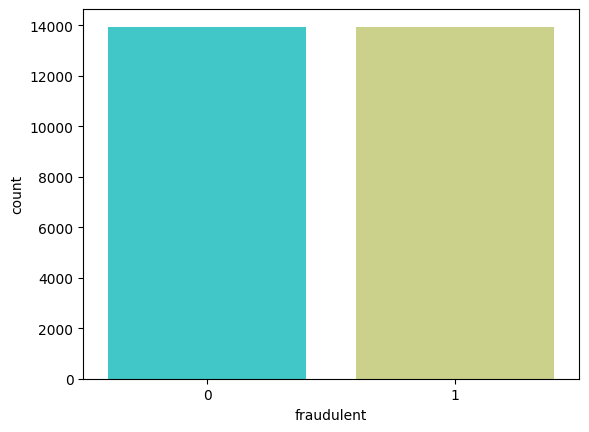

In [34]:
sns.countplot(data=df,x='fraudulent',palette='rainbow')

<ipython-input-35-99d186893f5d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='country', order=country, palette='rainbow')


Text(0, 0.5, 'No. of Jobs')

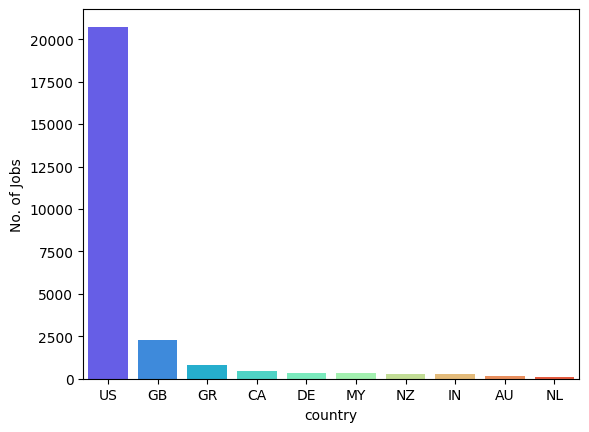

In [35]:
country = df['country'].value_counts().nlargest(10).index.tolist()
ax=sns.countplot(data=df, x='country', order=country, palette='rainbow')
ax.set_ylabel('No. of Jobs')

<ipython-input-36-a2717cbc75a3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='employment_type', palette='rainbow')


Text(0, 0.5, 'No. of Jobs')

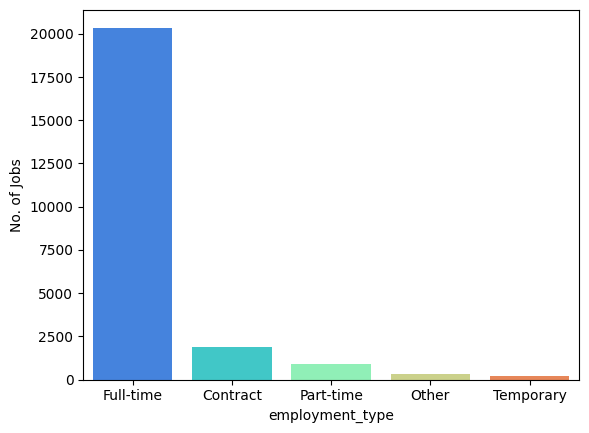

In [36]:
ax=sns.countplot(data=df, x='employment_type', palette='rainbow')
ax.set_ylabel('No. of Jobs')

In [37]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,6173,Dispatcher,"US, OH, Cincinnati",NaN,NaN,Bradley Contracting Group Corporation offers a...,"Organizes item orders by editing for price, pr...","Documentation Skills, Data Entry Skills, Tele...",To Be Determined.,1,Full-time,Entry level,High School or equivalent,Transportation/Trucking/Railroad,Distribution,1,US
1,10113,Subsea Process Plant Layout Designer,"US, TX, Houston",NaN,NaN,Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributesQualif...,We offer• Friendly colleagues in an industry w...,1,Full-time,NaN,NaN,Oil & Energy,Engineering,1,US
2,813,UST Testing Technician II,"US, CA, Bakersfield",Oil & Energy,65000-75000,...,"UST Testing Technician II Bakersfield, CA L...",Job site set-up.Loading and unloading of equip...,Competitive compensation package including bas...,1,Full-time,Mid-Senior level,Certification,Oil & Energy,Other,1,US
3,8693,Payroll Clerk,"US, IN, INDIANAPOLIS",Accounting/Payroll,NaN,At DynCorp International it is our commitment ...,Payroll Clerk Job Purpose: Responsible for Com...,Required Tools Needed below:1. A good computer...,NaN,1,Full-time,Entry level,High School or equivalent,Accounting,Finance,1,US
4,6375,Urgent position for SQL BI Tester,"US, WA, Redmond",NaN,45-48,NaN,"SQL BI Tester Location: Redmond, WADuration: 6...",Mandatory:Experience working in a waterfall S...,NaN,1,Contract,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,1,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27869,17873,Product Manager,"US, CA, San Francisco",Product Development,NaN,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,1,Full-time,NaN,NaN,Internet,Product Management,0,US
27870,17874,Recruiting Coordinator,"US, NC, Charlotte",NaN,NaN,NaN,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,NaN,1,Contract,NaN,NaN,Utilities,NaN,0,US
27871,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0,CA
27872,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US


<ipython-input-38-1115eaf880f9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='required_experience', palette='rainbow')


Text(0, 0.5, 'No. of Jobs')

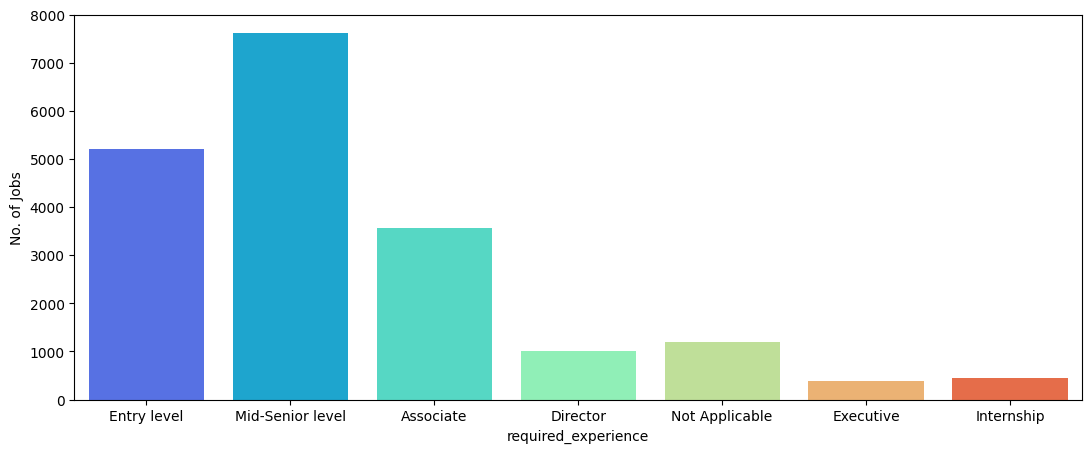

In [38]:
plt.figure(figsize=(13,5))
ax = sns.countplot(data=df, x='required_experience', palette='rainbow')
ax.set_ylabel('No. of Jobs')

<ipython-input-39-e1dcd49fd9d7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=df, x='required_education', order=country, palette='rainbow')


Text(0, 0.5, 'No. of Jobs')

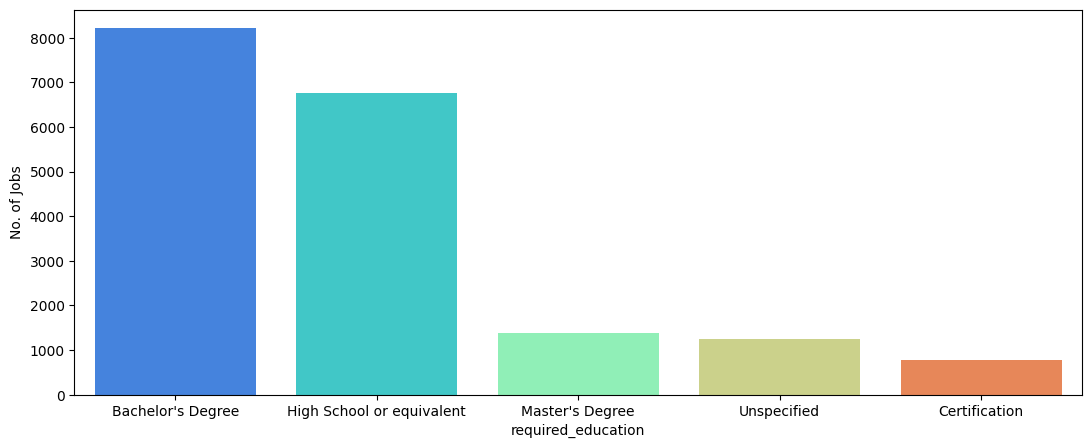

In [39]:
plt.figure(figsize=(13,5))
country = df['required_education'].value_counts().nlargest(5).index.tolist()
ax=sns.countplot(data=df, x='required_education', order=country, palette='rainbow')
ax.set_ylabel('No. of Jobs')

In [40]:
df.fillna(' ',inplace=True)

In [41]:
df.isnull().sum()

,0
job_id,0
title,0
location,0
department,0
salary_range,0
company_profile,0
description,0
requirements,0
benefits,0
has_company_logo,0


In [42]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,has_company_logo,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,6173,Dispatcher,"US, OH, Cincinnati",,,Bradley Contracting Group Corporation offers a...,"Organizes item orders by editing for price, pr...","Documentation Skills, Data Entry Skills, Tele...",To Be Determined.,1,Full-time,Entry level,High School or equivalent,Transportation/Trucking/Railroad,Distribution,1,US
1,10113,Subsea Process Plant Layout Designer,"US, TX, Houston",,,Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributesQualif...,We offer• Friendly colleagues in an industry w...,1,Full-time,,,Oil & Energy,Engineering,1,US
2,813,UST Testing Technician II,"US, CA, Bakersfield",Oil & Energy,65000-75000,...,"UST Testing Technician II Bakersfield, CA L...",Job site set-up.Loading and unloading of equip...,Competitive compensation package including bas...,1,Full-time,Mid-Senior level,Certification,Oil & Energy,Other,1,US
3,8693,Payroll Clerk,"US, IN, INDIANAPOLIS",Accounting/Payroll,,At DynCorp International it is our commitment ...,Payroll Clerk Job Purpose: Responsible for Com...,Required Tools Needed below:1. A good computer...,,1,Full-time,Entry level,High School or equivalent,Accounting,Finance,1,US
4,6375,Urgent position for SQL BI Tester,"US, WA, Redmond",,45-48,,"SQL BI Tester Location: Redmond, WADuration: 6...",Mandatory:Experience working in a waterfall S...,,1,Contract,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,1,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27869,17873,Product Manager,"US, CA, San Francisco",Product Development,,Flite delivers ad innovation at scale to the w...,Flite's SaaS display ad platform fuels the wor...,BA/BS in Computer Science or a related technic...,Competitive baseAttractive stock option planMe...,1,Full-time,,,Internet,Product Management,0,US
27870,17874,Recruiting Coordinator,"US, NC, Charlotte",,,,RESPONSIBILITIES:Will facilitate the recruitin...,REQUIRED SKILLS:Associates Degree or a combina...,,1,Contract,,,Utilities,,0,US
27871,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,1,Full-time,Mid-Senior level,,Computer Software,Sales,0,CA
27872,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US


In [43]:
df['combined_text'] = df[['title', 'location', 'salary_range','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function','department']].apply(lambda x: ' '.join(x), axis=1)

df.drop(columns=['title',
                 'location',
                 'salary_range',
                 'company_profile',
                 'description',
                 'requirements',
                 'benefits',
                 'employment_type',
                 'required_experience',
                 'required_education',
                 'industry',
                 'function',
                 'department'], inplace=True)

In [44]:
df.drop('country',axis=1,inplace=True)

In [45]:
df.head()

,job_id,has_company_logo,fraudulent,combined_text
0,6173,1,1,"Dispatcher US, OH, Cincinnati Bradley Contra..."
1,10113,1,1,"Subsea Process Plant Layout Designer US, TX, H..."
2,813,1,1,"UST Testing Technician II US, CA, Bakersfield..."
3,8693,1,1,"Payroll Clerk US, IN, INDIANAPOLIS At DynCor..."
4,6375,1,1,"Urgent position for SQL BI Tester US, WA, Redm..."


In [46]:
fake=df[df['fraudulent']==1]['combined_text']
real=df[df['fraudulent']==0]['combined_text']

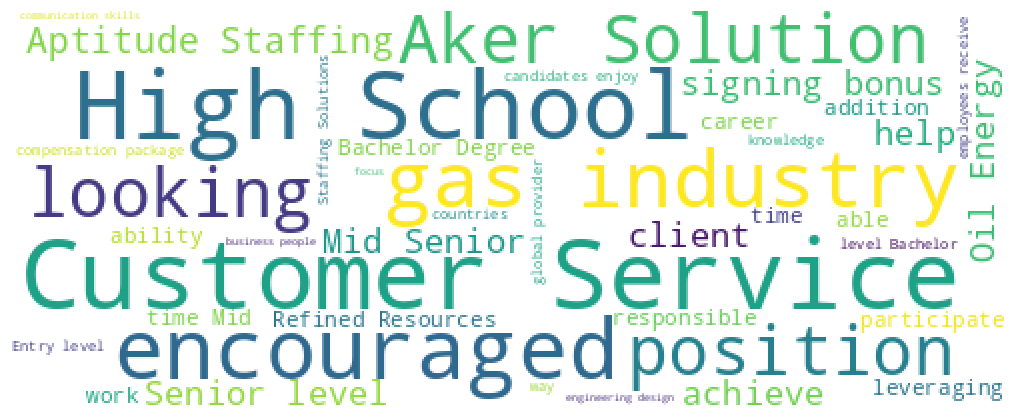

In [47]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS

wordcloud = WordCloud(min_font_size=4,width=500, height=200, background_color='white',stopwords=STOPWORDS).generate(' '.join(fake))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

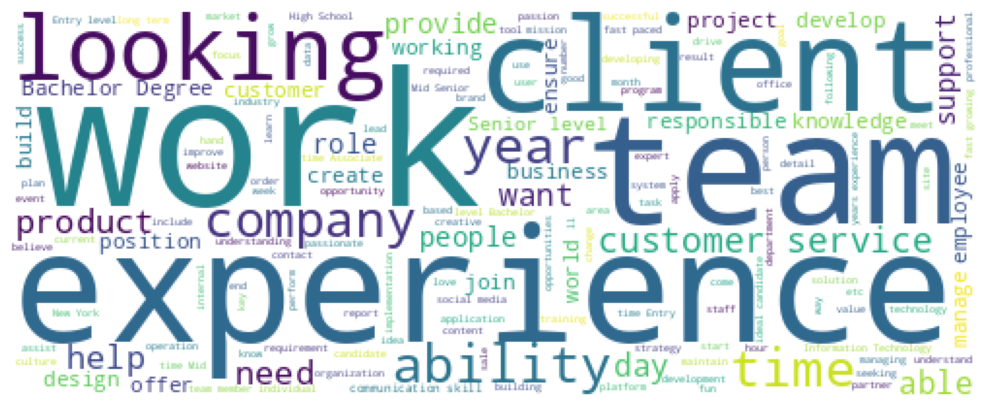

In [48]:
wordcloud = WordCloud(min_font_size=4,width=500, height=200, background_color='white',stopwords=STOPWORDS).generate(' '.join(real))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

In [53]:
nltk.download("popular")


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

# Data Cleaning


In [60]:
def clean_text(text):

    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    tokens = nltk.word_tokenize(text)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    # stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)

    return cleaned_text

In [61]:
# nltk.download('punkt', download_dir='c:\\Users\\PC\\Data\\ads_fraud_detection\\.conda\\nltk_data')
# nltk.download(download_dir='c:\\Users\\PC\\Data\\ads_fraud_detection\\.conda\\nltk_data')

In [62]:
# import nltk

# print(nltk.data.path)


In [63]:
df['combined_text']=df['combined_text'].apply(clean_text)

In [64]:
df.head()

,job_id,has_company_logo,fraudulent,combined_text
0,6173,1,1,dispatcher us oh cincinnati bradley contractin...
1,10113,1,1,subsea process plant layout designer us tx hou...
2,813,1,1,ust testing technician ii us ca bakersfield 65...
3,8693,1,1,payroll clerk us indianapolis dyncorp internat...
4,6375,1,1,urgent position sql bi tester us wa redmond 45...


# Data Normalization

Using spaCy's English language model (`en_core_web_sm`) for text preprocessing. The function called `normalize_text` tokenizes the input text, lemmatizes each token, and then returns the normalized text.

In [65]:
nlp = spacy.load("en_core_web_sm")

def normalize_text(text):
    # Tokenize the text and apply lemmatization
    doc = nlp(text)
    normalized_words = [token.lemma_ for token in doc]
    normalized_text = ' '.join(normalized_words)
    return normalized_text


In [66]:
df['combined_text']=df['combined_text'].apply(normalize_text)

In [67]:
numeric_columns = list(df.select_dtypes(['number']).columns)
numeric_columns
change_tocategory=[i for i in numeric_columns if len(df[i].unique())<=46]
#change_tocategory.remove('umbrella_limit')
change_tocategory

['has_company_logo', 'fraudulent']

In [68]:
df[change_tocategory]=df[change_tocategory].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27874 entries, 0 to 27873
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   job_id            27874 non-null  int64   
 1   has_company_logo  27874 non-null  category
 2   fraudulent        27874 non-null  category
 3   combined_text     27874 non-null  object  
dtypes: category(2), int64(1), object(1)
memory usage: 490.3+ KB


In [69]:
df.to_csv(f'/content/drive/MyDrive/df_EDA.csv', index=None)
object_columns = list(df.select_dtypes(['object']).columns)
df[object_columns]=df[object_columns].astype('category')
category_columns = list(df.select_dtypes(['category']).columns)
numeric_columns = list(df.select_dtypes(['number']).columns)

np.savez(f'/content/drive/MyDrive/columns_dtype.npz', category_columns = category_columns, numeric_columns = numeric_columns)
